# Apple Music Data Project

This project focuses on a dataset which was requested from apple data privacy and includes various information in relation to my music listening. The aim of the project is to find interesting insights into my music listening habits.

Readying the workspace with 'imports' and such

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy()

Importing primary dataset into workspace

In [3]:
csv_filepath = 'Apple Music Play Activity.csv'
listening_data = pd.read_csv(csv_filepath)
listening_data

json_filepath = 'Apple Music Library Tracks.json'
library_data = pd.read_json(json_filepath)
pd.set_option('display.max_columns', None)
library_data


,Content Type,Track Identifier,Title,Sort Name,Artist,Sort Artist,Is Part of Compilation,Album,Sort Album,Album Artist,Genre,Track Year,Track Number On Album,Track Count On Album,Disc Number Of Album,Disc Count Of Album,Track Duration,Track Play Count,Date Added To Library,Date Added To iCloud Music Library,Last Modified Date,Last Played Date,Skip Count,Date of Last Skip,Is Purchased,Audio File Extension,Is Checked,Copyright,Release Date,Purchased Track Identifier,Apple Music Track Identifier,Composer,Tag Matched Track Identifier,Track Like Rating,Album Like Rating,Comments,Purchase Date,Rating,Album Rating,Remember Playback Position,Album Rating Method,Playlist Only Track,Display Work Name,Grouping
0,Song,182857262,The Library (Intro),Library (Intro),Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,1,19,1,1,4812,28,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2018-03-22T12:43:32Z,4,2018-01-23T23:11:57Z,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Song,182857266,I. Crawl,I. Crawl,Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,2,19,1,1,209473,14,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2018-04-26T01:01:37Z,2,2018-04-19T20:52:44Z,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Song,182857270,II. Worldstar,II. Worldstar,Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,3,19,1,1,244652,10,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2017-12-10T02:01:10Z,4,2018-04-27T02:08:21Z,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Song,182857474,Dial Up,Dial Up,Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,4,19,1,1,44536,14,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2018-05-06T15:08:06Z,6,2018-03-08T22:33:43Z,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Song,182857478,I. The Worst Guys (feat. Chance the Rapper),I. The Worst Guys (feat. Chance the Rapper),Childish Gambino,Childish Gambino,False,Because the Internet,Because the Internet,Childish Gambino,Hip-Hop/Rap,2013,5,19,1,1,219740,15,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2016-07-05T21:00:57Z,2018-07-19T19:10:32Z,0,NaN,False,m4a,False,℗ 2013 Liberator Music,2013-12-10T00:00:00Z,7.403740e+08,7.403740e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,Song,182895118,All Night,All Night,The Vamps & Matoma,Vamps & Matoma,False,Night & Day (Night Edition) [Deluxe Version],Night & Day (Night Edition) [Deluxe Version],The Vamps,Pop,2016,2,10,1,1,197640,0,2020-06-13T20:59:04Z,2020-06-13T20:59:04Z,2020-06-13T20:59:04Z,NaN,0,NaN,False,m4a,False,"℗ 2017 Virgin EMI Records, a division of Unive...",2016-10-14T05:00:00Z,1.440900e+09,1.440900e+09,"Bradley Simpson, James McVey, Connor Ball, Tri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2065,Song,182895122,Rover (feat. DTG),Rover (feat. DTG),S1mba,S1mba,False,Rover (feat. DTG) - Single,Rover (feat. DTG) - Single,S1mba,Hip-Hop/Rap,2020,1,1,1,1,167917,0,2020-06-16T01:24:34Z,2020-06-16T01:24:34Z,2020-06-16T01:24:34Z,NaN,0,NaN,False,m4a,False,℗ 2020 Rax Productions Limited under exclusive...,2020-03-04T00:00:00Z,1.501569e+09,1.501569e+09,"Ayodeji Araoye, Leonard Simbarashe Rwodzi & Ty...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2066,Song,1

In [4]:
library_data.columns

Index(['Content Type', 'Track Identifier', 'Title', 'Sort Name', 'Artist',
       'Sort Artist', 'Is Part of Compilation', 'Album', 'Sort Album',
       'Album Artist', 'Genre', 'Track Year', 'Track Number On Album',
       'Track Count On Album', 'Disc Number Of Album', 'Disc Count Of Album',
       'Track Duration', 'Track Play Count', 'Date Added To Library',
       'Date Added To iCloud Music Library', 'Last Modified Date',
       'Last Played Date', 'Skip Count', 'Date of Last Skip', 'Is Purchased',
       'Audio File Extension', 'Is Checked', 'Copyright', 'Release Date',
       'Purchased Track Identifier', 'Apple Music Track Identifier',
       'Composer', 'Tag Matched Track Identifier', 'Track Like Rating',
       'Album Like Rating', 'Comments', 'Purchase Date', 'Rating',
       'Album Rating', 'Remember Playback Position', 'Album Rating Method',
       'Playlist Only Track', 'Display Work Name', 'Grouping'],
      dtype='object')

,Title,Artist,Skip Count
9,Playing Around Before the Party Starts,Childish Gambino,12
12,Death By Numbers,Childish Gambino,11
567,Be Yourself,Frank Ocean,13
622,Skin,Mac Miller,12
640,lose,Travis Scott,12
643,Let It Bang (feat. ScHoolboy Q),A$AP Ferg,12
647,Swipe Life (feat. Rick Ross),A$AP Ferg,11
661,ULT,Denzel Curry,11
1127,Romeo & Juliet,Trippie Redd,12
1129,Mega Man,Tay-K,15


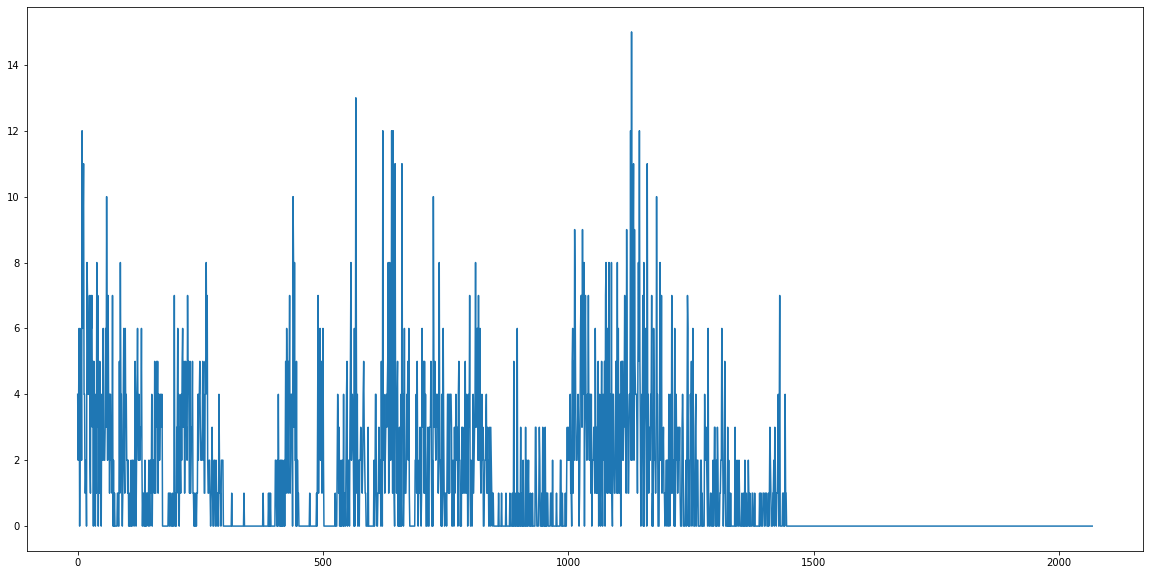

In [5]:
library_data['Skip Count'].plot()
skips = library_data[['Title', 'Artist', 'Skip Count']]
skips[library_data['Skip Count'] > 10]

,Title,Artist,track_duration_minutes
84,Note to Self,J. Cole,14.588083
217,Mortal Man,Kendrick Lamar,12.118367
227,"Sing About Me, I'm Dying of Thirst",Kendrick Lamar,12.059667
1015,AfricAryaN (feat. Neil deGrasse Tyson),Logic,12.140050
1064,Note to Self,J. Cole,14.588083


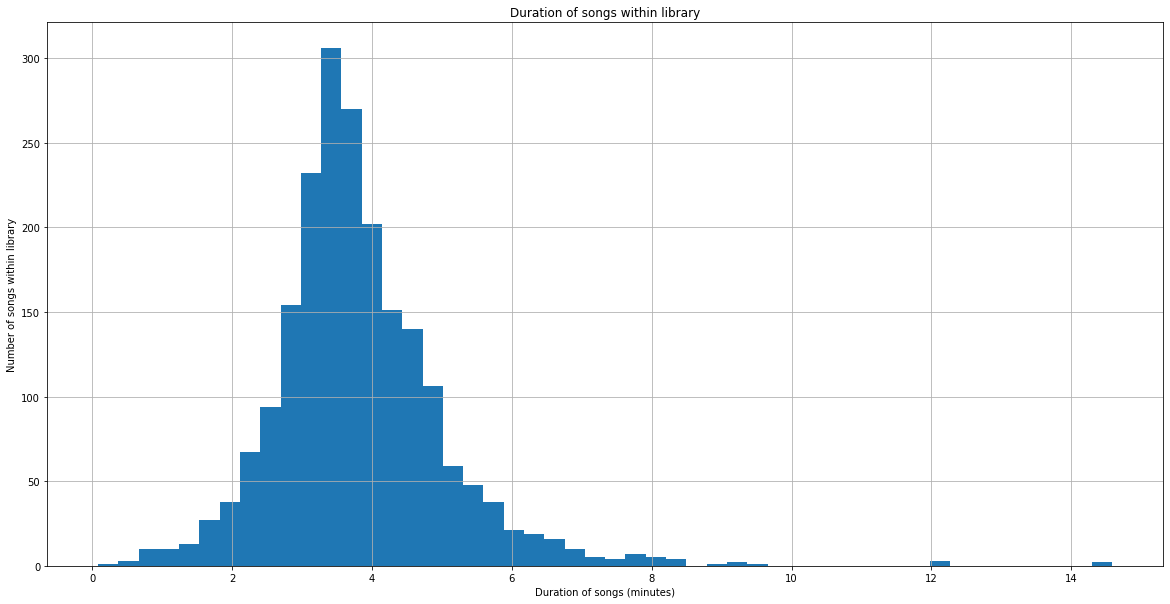

In [6]:
library_data["track_duration_minutes"] = library_data["Track Duration"] / 60000
library_data["track_duration_minutes"].hist(bins=50)
plt.xlabel('Duration of songs (minutes)')
plt.ylabel('Number of songs within library')
plt.title('Duration of songs within library')
plt.grid(True)
plt.show

titles = library_data[['Title', 'Artist', 'track_duration_minutes']]
titles[titles.track_duration_minutes > 10]

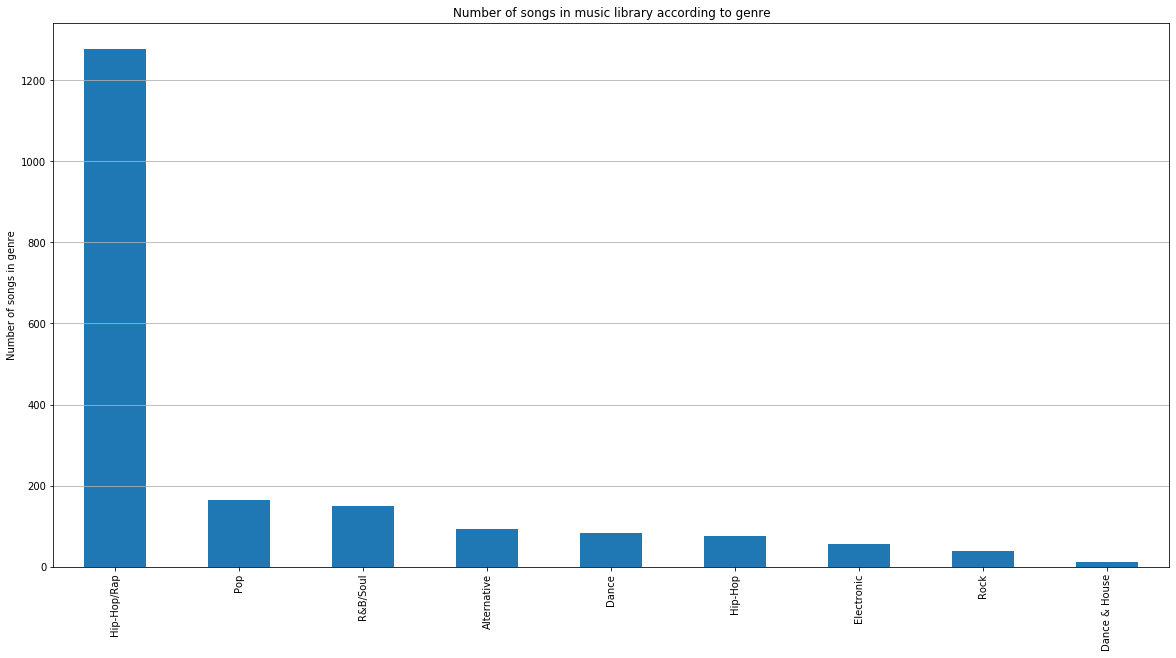

In [7]:
genre_bar = library_data["Genre"].value_counts()
genre_bar[genre_bar > 10].plot(kind='bar')
plt.ylabel('Number of songs in genre')
plt.title('Number of songs in music library according to genre')
plt.axes().yaxis.grid()
plt.show()

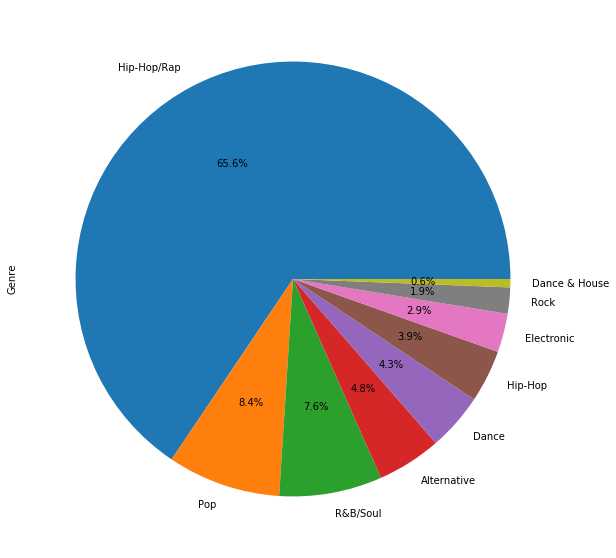

In [8]:
genre_pie = library_data["Genre"].value_counts()
genre_pie[genre_pie > 10].plot(kind='pie', autopct='%1.1f%%')


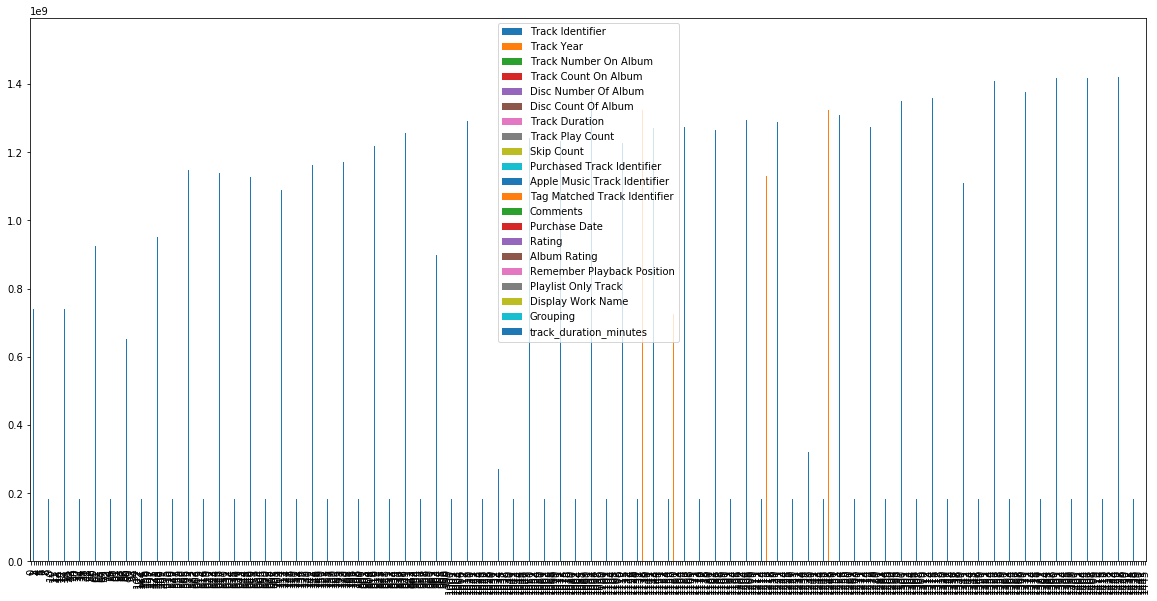

In [9]:
library_data[library_data['Track Play Count'] > 10].plot(kind='bar')
plt.show()
#play_count = library_data['Track Play Count'].value_counts
#play_count
#play_count[play_count > 10].plot(kind='bar')